In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

In [ ]:
telcodf = pd.read_csv('Telco-Customer-Churn.csv')
telcodf.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4211,2034-CGRHZ,Male,1,No,No,24,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.95,2496.7,Yes
3206,6972-SNKKW,Female,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,109.2,No
5636,0601-WZHJF,Male,0,Yes,No,14,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,46.35,667.7,Yes
2339,4094-NSEDU,Female,1,No,No,21,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.25,1973.75,Yes
7009,7703-ZEKEF,Male,0,No,No,23,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.00,1917.1,Yes


We will be dropping customer id column, since this column is not helpful in the modelling that we will be proformming

In [ ]:
telcodf.drop('customerID',axis='columns',inplace=True)

In [ ]:
telcodf.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Change **"TotalCharges"** data type to object

In [ ]:
pd.to_numeric(telcodf.TotalCharges)
telcodf.dtypes

In [ ]:
pd.to_numeric(telcodf.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
telcodf[pd.to_numeric(telcodf.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
telcodf2 = telcodf[telcodf.TotalCharges != ' ']

In [ ]:
telcodf.shape

(7043, 20)

In [ ]:
telcodf2.shape

(7032, 20)

In [ ]:
telcodf2.TotalCharges = pd.to_numeric(telcodf2.TotalCharges)

Column **"TotalCharges"** changed the datatype

In [ ]:
telcodf2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**How many of the loyal customers are leaving **

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


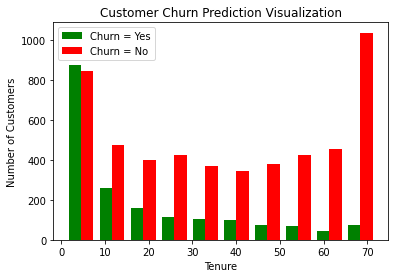

In [ ]:
tenure_churn_no = telcodf2[telcodf2.Churn =='No'].tenure
tenure_churn_yes = telcodf2[telcodf2.Churn =='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no],
         color=['green','red'],
         label = ['Churn = Yes','Churn = No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


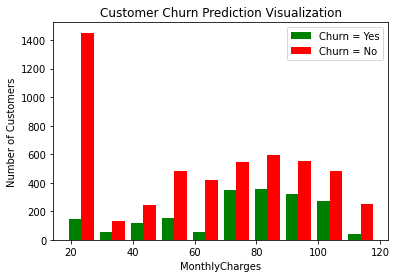

In [ ]:
MonthlyCharges_churn_no = telcodf2[telcodf2.Churn =='No'].MonthlyCharges      
MonthlyCharges_churn_yes = telcodf2[telcodf2.Churn =='Yes'].MonthlyCharges      

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([MonthlyCharges_churn_yes,MonthlyCharges_churn_no],
         color=['green','red'],
         label = ['Churn = Yes','Churn = No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column} : {df[column].unique()}')

In [ ]:
telcodf2.replace('No internet service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
telcodf2.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
print_unique_col_values(telcodf2)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
yes_no_columns =['Partner','Dependents','PhoneService','MultipleLines',
                 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                 'StreamingTV','StreamingMovies','PaperlessBilling',
                 'Churn']

for col in yes_no_columns:
  telcodf2[col].replace({'Yes': 1,'No': 0},inplace=True)


In [ ]:
print_unique_col_values(telcodf2)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
  telcodf2['gender'].replace({'Female': 1,'Male': 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


# **One-Hot Encode**

In [ ]:
telcodf3 = pd.get_dummies(data=telcodf2,columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
telcodf3.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5050,0,0,1,0,66,1,1,1,0,1,0,1,1,1,106.05,6981.35,1,0,1,0,0,0,1,0,1,0,0
5171,1,0,1,0,12,1,0,0,0,0,0,0,0,0,45.90,505.95,0,1,0,0,1,0,0,1,0,0,0
1037,1,0,0,0,13,0,0,0,0,1,0,1,1,0,49.15,649.40,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
telcodf3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# **Data Scaling **

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

telcodf3[cols_to_scale]=scaler.fit_transform(telcodf3[cols_to_scale])

In [ ]:
telcodf3.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5511,0,0,1,0,0.971831,1,1,1,0,0,1,1,1,1,0.584080,0.608239,0,1,0,0,0,0,1,0,1,0,0
3353,0,0,1,0,0.154930,1,0,0,1,0,0,0,1,1,0.664677,0.113201,0,0,1,0,1,0,0,0,1,0,0
103,1,1,1,0,0.915493,0,0,0,1,1,0,1,0,0,0.271642,0.347156,0,1,0,0,0,1,0,1,0,0,0


In [ ]:
x= telcodf3.drop('Churn',axis='columns')
y=telcodf3['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(26, input_shape=(26,),activation='relu'),
                          keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss ='binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5570 - accuracy: 0.6980
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.7866
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.7998
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8013
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8017
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8146
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8142
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4110 - accuracy: 0.8104
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.8151
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3985 - accura

In [ ]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 967us/step - loss: 0.4598 - accuracy: 0.7790


[0.45981794595718384, 0.7789623141288757]

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict

array([[0.2051135 ],
       [0.37998486],
       [0.00880712],
       ...,
       [0.73851025],
       [0.7093406 ],
       [0.73656595]], dtype=float32)

In [ ]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
y_pred =[]
for element in y_predict:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Actual')

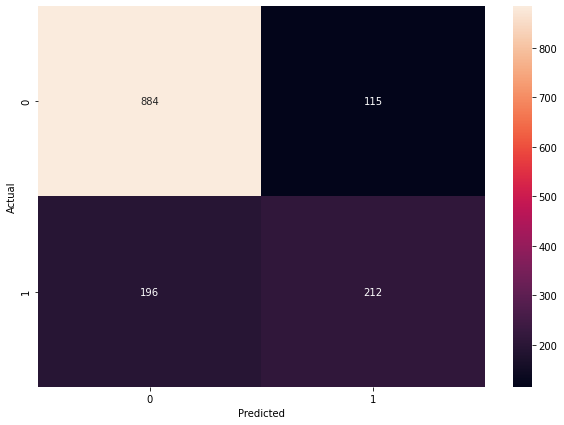

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize =(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")